### 46. Funciones de distribución de probabilidades

- La distribución uniforme
- La distribución normal

### 47. La distribución uniforme

Generar números de forma aleatoria con la misma probabilidad de salir unos que otros

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # dibujar histograma

In [2]:
a = 1
b = 100
n = 200000
data = np.random.uniform(a, b, n)

(array([20027., 19981., 19997., 19926., 19987., 20142., 20003., 20052.,
        19978., 19907.]),
 array([ 1.00009412, 10.90000314, 20.79991215, 30.69982116, 40.59973018,
        50.49963919, 60.3995482 , 70.29945722, 80.19936623, 90.09927524,
        99.99918426]),
 <BarContainer object of 10 artists>)

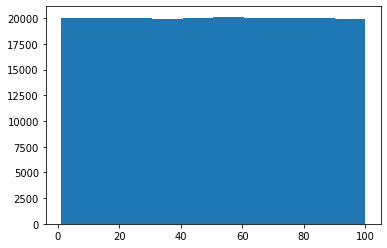

In [3]:
# Histograma 
#%matplotlib.inline
plt.hist(data)

### 48. La distribución normal

Conocida tambien como __Campana de Gauss__.


In [4]:
# Ojo con la 'n' RAND-N
data = np.random.randn(10000)

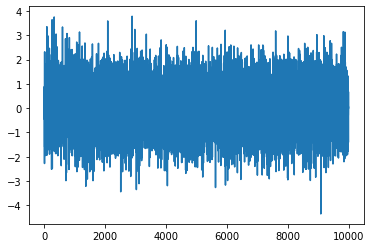

In [5]:
x = range(1,10001)
plt.plot(x,data)

(array([1.000e+00, 2.300e+01, 2.270e+02, 1.075e+03, 2.521e+03, 3.179e+03,
        2.068e+03, 7.710e+02, 1.150e+02, 2.000e+01]),
 array([-4.35511081, -3.54132804, -2.72754526, -1.91376249, -1.09997971,
        -0.28619694,  0.52758583,  1.34136861,  2.15515138,  2.96893415,
         3.78271693]),
 <BarContainer object of 10 artists>)

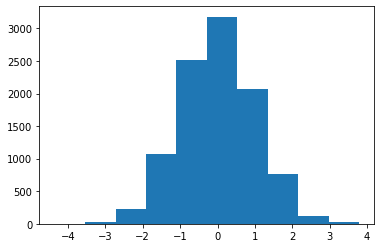

In [6]:
plt.hist(data)

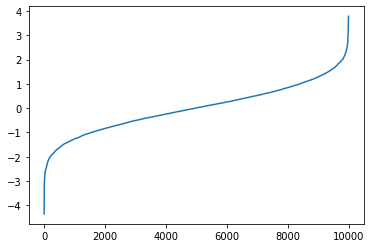

In [7]:
# Funcion 'distribución acumulada' -> Pintar los datos ordenados
plt.plot(x, sorted(data))

(array([  10.,   67.,  376., 1291., 2420., 2895., 1983.,  767.,  169.,
          22.]),
 array([-4.46155501, -2.57559562, -0.68963623,  1.19632315,  3.08228254,
         4.96824192,  6.85420131,  8.74016069, 10.62612008, 12.51207946,
        14.39803885]),
 <BarContainer object of 10 artists>)

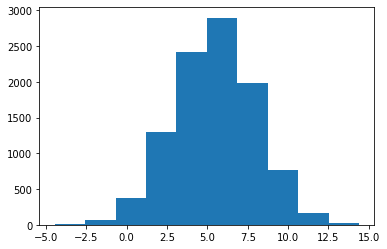

In [8]:
# Mi propia media y mi propia desviacion acumulada
mu = 5.5 # media
sd = 2.5 # desviacion acumulada
Z = np.random.randn(10000)

data = mu + sd*Z # z = (X - mu) / sd, X = mu + sd *Z

plt.hist(data)

In [9]:
# 2 filas y 4 columnas que se utilizan luego como 2 columnas de 4 filas
data = np.random.randn(2,4)
data

array([[-0.42773297, -0.26213246,  0.37885321,  2.04701441],
       [ 1.92600201,  1.3622462 , -2.0675405 ,  0.30207252]])

### 49. El método de la simulacion de Monte-Carlo para encontrar el valor de Pi

Se usa para simular el valor exacto de la constante Pi.

- Generamos dos números aleatorios enter 0 y 1 (1000 veces)
- Calcularemos x * x + y * y: (circulo)
    + Si el valor es inferior a 1 -> estamos dentro del circulo
    + Si el valor es superior a 1 -> estamos fuera del ciruclo
- Calculamos el numero total de veces que estan dentro del circulo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
- Usamos dicha propabilidad para aproximar el número de Pi.
- Repetimos el experimento un número suficiente de veces (100) para, para obtener aproximadamente PI.
- Calculamos el promedio de los experimentos anteriores para dar un valor final de PI.
    

0.015740400000000005


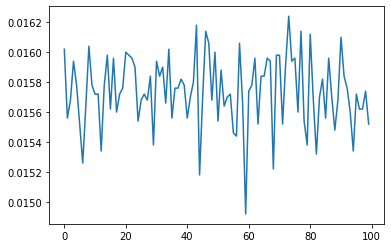

In [10]:
pi_avg = 0
pi_value_list = []
n_tries = 1000                # Nº de puntos (intentos) dentro o fuera del circulo
n_experiments = 100           # nº de experimentos o ensayos
for i in range(n_experiments):
    value = 0
    x = np.random.uniform(0,1,n_tries).tolist()
    y = np.random.uniform(0,1,n_tries).tolist()
    
    for j in range(n_tries):
        z = x[j] * x[j] + y[j] * y[j]
        
        if z <=1:
            value += 1
        
    float_value = float(value)
    pi_value = float_value * 4 / n
    pi_value_list.append(pi_value)
    pi_avg += pi_value
    
pi = pi_avg/n_experiments

print(pi)
plt.plot(pi_value_list)


In [11]:
# Creamos funcion
def pi_montecarlo(n_tries, n_experiments):
    pi_avg = 0
    pi_value_list = []

    for i in range(n_experiments):
        value = 0
        x = np.random.uniform(0,1,n_tries).tolist()
        y = np.random.uniform(0,1,n_tries).tolist()
    
        for j in range(n_tries):
            z = x[j] * x[j] + y[j] * y[j]
        
            if z <=1:
                value += 1
        
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    
    pi = pi_avg/n_experiments
    print(pi)
    fig = plt.plot(pi_value_list)
    
    return (pi, fig)




0.01571120000000001


(0.01571120000000001, [<matplotlib.lines.Line2D at 0x1ea3c5176d0>])

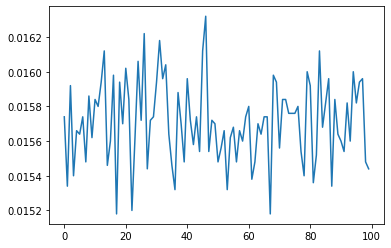

In [13]:
pi_montecarlo(1000,100)

### 50. Dummy data frames

In [32]:
import pandas as pd

mu = 1.5 # media
sd = 2.5 # desviacion tipica

n = 1000

data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : mu + sd*np.random.randn(n),
        'C' : np.random.uniform(5, 12, n)
    }
)

In [33]:
# Descripcion de los datos: media, desviacion tipica, cuartiles, max, min
data.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,0.000692,1.536884,8.593775
std,0.993119,2.463960,2.000097
min,-2.869197,-6.370932,5.006226
25%,-0.687792,-0.085444,6.922884
50%,-0.043701,1.551407,8.647607
75%,0.698927,3.134207,10.310238
max,2.970640,9.474007,11.981138


(array([  5.,  25.,  53., 182., 235., 250., 152.,  71.,  21.,   6.]),
 array([-6.37093175, -4.78643785, -3.20194394, -1.61745004, -0.03295613,
         1.55153777,  3.13603168,  4.72052558,  6.30501949,  7.88951339,
         9.47400729]),
 <BarContainer object of 10 artists>)

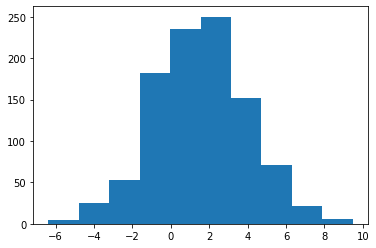

In [37]:
plt.hist(data["B"])

In [42]:
import os 
# Path para leer los archivos del tuto
read_path = "/Users/snopv/PycharmProjects/DataScience_Python/datasets/"
# Archivo
filename = "customer-churn-model/Customer Churn Model.txt"
# Fullpath de lectura
read_fullpath = os.path.join(read_path,filename)


data = pd.read_csv(read_fullpath)


In [43]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [45]:
column_names = data.columns.values.tolist()

In [46]:
a = len(column_names)
a

21

In [52]:
# El tamaño tiene que ser el mismo a=21
new_data = pd.DataFrame(
    {
        'Column Name' : column_names,
        'A' : np.random.rand(a),
        'B' : np.random.uniform(0,1,a)      
    }, index = range(42, 42 + a)         # Modificar la numeracion para que no empiece en 0
)

In [54]:
new_data

,Column Name,A,B
42,State,0.452875,0.300024
43,Account Length,0.732309,0.569880
44,Area Code,0.193208,0.455039
45,Phone,0.755908,0.890297
46,Int'l Plan,0.999775,0.002094
47,VMail Plan,0.587549,0.154960
48,VMail Message,0.302155,0.300480
49,Day Mins,0.956664,0.484443
50,Day Calls,0.324424,0.798317
51,Day Charge,0.124658,0.287540
